# Least Absolute Shrinkage And Selection Operator regularization 

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
from numpy import mean,std, absolute
from sklearn.model_selection import cross_val_score,RepeatedKFold,GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
dataframe.drop(columns=11,inplace=True)
# summarize shape
print(dataframe.shape)

(506, 13)


In [3]:
dataframe.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


## Define X & y for regression model

In [4]:
X, y = dataframe.iloc[:, :-1], dataframe.iloc[:, -1]

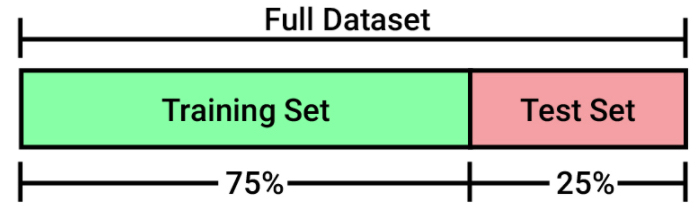
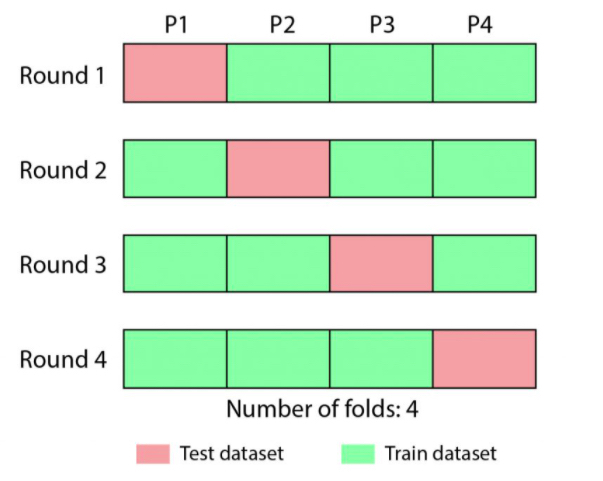

## Linear regression model

In [5]:
lreg = LinearRegression().fit(X, y)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)
# evaluate model
scores = cross_val_score(lreg, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.484 (0.484)


In [6]:
lreg.fit(X,y)
lreg.coef_

array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

In [7]:
len(lreg.coef_) # there are 12 features hence 12 coefficients

12

# LASSO regression model

In [8]:
# define model
model = Lasso(alpha=1.0,normalize=True)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 6.660 (0.706)


In [9]:
model.fit(X,y)

Lasso(normalize=True)

In [10]:
print(model.coef_)

[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.]


In [11]:
lreg.coef_

array([-1.21388618e-01,  4.69634633e-02,  1.34676947e-02,  2.83999338e+00,
       -1.87580220e+01,  3.65811904e+00,  3.61071055e-03, -1.49075365e+00,
        2.89404521e-01, -1.26819813e-02, -9.37532900e-01, -5.52019101e-01])

In [12]:
model2 = Lasso(alpha=0.0001,normalize=True)
model2.fit(X,y)
print(model2.coef_)

[-1.20625564e-01  4.64971514e-02  1.03868743e-02  2.84246131e+00
 -1.85926917e+01  3.66393575e+00  3.25226391e-03 -1.48671156e+00
  2.84691012e-01 -1.24418905e-02 -9.35122990e-01 -5.51297414e-01]


# Hyperparameter tuning - Choose optimal value of alpha

In [13]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.455
Config: {'alpha': 0.02}


In [14]:
search.best_estimator_

Lasso(alpha=0.02)

In [15]:
model_best = search.best_estimator_
model_best.fit(X,y)
model_best.coef_

array([-1.18262415e-01,  4.79454826e-02, -1.15737285e-02,  2.47578885e+00,
       -1.21068896e+01,  3.66310687e+00, -1.29963388e-03, -1.38218552e+00,
        2.74751693e-01, -1.33717669e-02, -8.65135562e-01, -5.64714373e-01])

/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5420.15945913139, tolerance: 3.8821705054945044
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not conve

/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5139.756251116014, tolerance: 3.7981172879120875
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not conv

/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4553.5885960539645, tolerance: 3.8221698593406606
  model = cd_fast.enet_coordinate_descent(
/home/kingston_machismo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not con